In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spotify.csv')

# pre-look into the data to determine properties of similarity (to define similarity)
df.head()

# are there duplicated track_id / track_name we have to handle?

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
print(df.columns)
pre_df = df.copy()
pre_df = pre_df.drop(['Unnamed: 0', 'duration_ms', 'explicit', 'time_signature', 'key'], axis=1)

pre_df.head(20)

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


,track_id,artists,album_name,track_name,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,0.688,0.4810,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,0.407,0.1470,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,0.703,0.4440,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,0.625,0.4140,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,acoustic
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,0.442,0.6320,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,acoustic


In [4]:
# pre_proc df ideas
# Filter out any songs by The Strokes except those from the "Is This It" album 
# danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, genre and tempo
# Normalize the data
# Sampling

In [5]:
# Normalize the data
from sklearn.preprocessing import MinMaxScaler

# features that might influence song similarity - no need for mode (binary) and genre (categorical)
continuous_features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                       'instrumentalness', 'liveness', 'valence', 'tempo']

# normalizing these features
scaler = MinMaxScaler()
pre_df[continuous_features] = scaler.fit_transform(pre_df[continuous_features])

pre_df.head()

,track_id,artists,album_name,track_name,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,0.73,0.686294,0.4610,0.791392,0,0.148187,0.032329,0.000001,0.3580,0.718593,0.361245,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,0.55,0.426396,0.1660,0.597377,1,0.079067,0.927711,0.000006,0.1010,0.268342,0.318397,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,0.57,0.444670,0.3590,0.736123,1,0.057720,0.210843,0.000000,0.1170,0.120603,0.313643,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,0.71,0.270051,0.0596,0.573701,1,0.037617,0.908635,0.000071,0.1320,0.143719,0.746758,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,0.82,0.627411,0.4430,0.737103,1,0.054508,0.470884,0.000000,0.0829,0.167839,0.492863,acoustic


In [6]:
the_strokes_album_songs = pre_df[(pre_df['artists'].str.contains("The Strokes")) & (pre_df['album_name'] == "Is This It")]

sampling_pool = pre_df[~((pre_df['artists'].str.contains("The Strokes")) & (pre_df['album_name'] == "Is This It"))]

# Sample other songs
sampled_songs = sampling_pool.sample(n=30000)

final_sampled_df = pd.concat([the_strokes_album_songs, sampled_songs])

final_sampled_df.head()

,track_id,artists,album_name,track_name,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
2709,7kzKAuUzOITUauHAhoMoxA,The Strokes,Is This It,Last Nite,0.74,0.633503,0.910,0.810684,1,0.030777,0.028614,0.000198,0.0789,0.770854,0.427502,alt-rock
38073,56NkIxSZZiMpFP5ZNSxtnT,The Strokes,Is This It,Someday,0.70,0.550254,0.531,0.777796,1,0.031192,0.003313,0.000002,0.3380,0.674372,0.435424,garage
38074,7kzKAuUzOITUauHAhoMoxA,The Strokes,Is This It,Last Nite,0.74,0.633503,0.910,0.810684,1,0.030777,0.028614,0.000198,0.0789,0.770854,0.427502,garage
38114,2pAD0PKMUMtxlMvz33tYzB,The Strokes,Is This It,Is This It,0.61,0.674112,0.679,0.762777,1,0.031088,0.149598,0.000048,0.3470,0.808040,0.394466,garage
38181,2LMloFiV7DHpBhITOaBSam,The Strokes,Is This It,Hard To Explain,0.63,0.412183,0.682,0.799993,1,0.060518,0.000415,0.849000,0.0999,0.626131,0.338967,garage


In [7]:
# sampling, normalizing and filtering done

final_sampled_df.to_csv('experimental_euclidian_spotify.csv')

In [8]:
from sklearn.metrics import pairwise_distances

# similarity measure to create a csv for relationships

# loading normalized dataset
df_norm = pd.read_csv('experimental_euclidian_spotify.csv')

# selecting features that I think is important for song similarity - Popularity (not recommend just feature close)?
features = ['popularity', 'danceability', 'energy', 'loudness', 'mode', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

# convering to np array
X = df_norm[features].values

# getting pairwise euclidean distances
distance_matrix = pairwise_distances(X, metric='euclidean')

# to include id information alongside distances (track id in case of identical (duplicate) song names)
song_ids = df_norm['track_id'].tolist()
distances_long_df = pd.DataFrame([(song_ids[i], song_ids[j], distance_matrix[i, j]) 
                                  for i in range(len(song_ids)) 
                                  for j in range(i + 1, len(song_ids))], 
                                 columns=['SongID1', 'SongID2', 'Distance'])

In [9]:
# Export to CSV
distances_long_df.to_csv('experimental_euclidian_relationships.csv', index=False)

In [10]:
distances_long_df.head()

,SongID1,SongID2,Distance
0,7kzKAuUzOITUauHAhoMoxA,56NkIxSZZiMpFP5ZNSxtnT,0.479998
1,7kzKAuUzOITUauHAhoMoxA,7kzKAuUzOITUauHAhoMoxA,0.000000
2,7kzKAuUzOITUauHAhoMoxA,2pAD0PKMUMtxlMvz33tYzB,0.403973
3,7kzKAuUzOITUauHAhoMoxA,2LMloFiV7DHpBhITOaBSam,0.929812
4,7kzKAuUzOITUauHAhoMoxA,4KC2Z9dL4jL61Ys35N6srg,0.360336


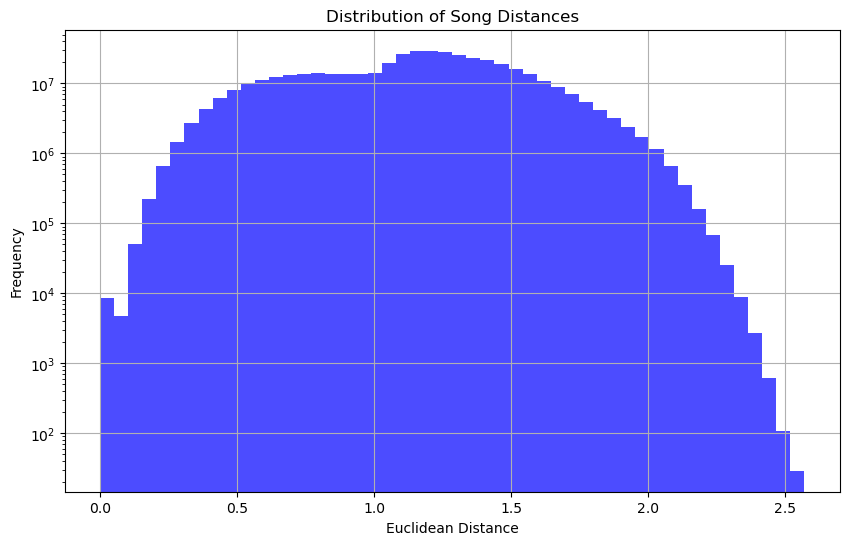

In [17]:
import matplotlib.pyplot as plt
# plotting the distribution of distances to decide threshold
plt.figure(figsize=(10, 6))
plt.hist(distances_long_df['Distance'], bins=50, alpha=0.7, color='blue')
plt.title('Distribution of Song Distances')
plt.xlabel('Euclidean Distance')
plt.ylabel('Frequency')
plt.yscale('log')
plt.grid(True)
plt.show()

In [12]:
# basic stats to help determine threshold
distances_long_df['Distance'].describe()

count    4.503451e+08
mean     1.144060e+00
std      3.668265e-01
min      0.000000e+00
25%      8.776538e-01
50%      1.176990e+00
75%      1.396992e+00
max      2.569987e+00
Name: Distance, dtype: float64

In [13]:
song = pre_df[pre_df['track_name'] == 'One Way Or Another - Remastered/2001'] 
# 3NRVfxtC8mYrPoHjKahcng - dispara | 2kk8L2MStsZ0tYLPkDrL64 - 地球号 | 5YqdiryRmdAzYFlxo43hAJ - Missing Piece
# 1Uu1dI6OcKWuMLLv8ki3lN - All Star
iti = pre_df[pre_df['album_name'] == 'Is This It']

#song.head()
iti

,track_id,artists,album_name,track_name,popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,track_genre
2709,7kzKAuUzOITUauHAhoMoxA,The Strokes,Is This It,Last Nite,0.74,0.633503,0.910,0.810684,1,0.030777,0.028614,0.000198,0.0789,0.770854,0.427502,alt-rock
38073,56NkIxSZZiMpFP5ZNSxtnT,The Strokes,Is This It,Someday,0.70,0.550254,0.531,0.777796,1,0.031192,0.003313,0.000002,0.3380,0.674372,0.435424,garage
38074,7kzKAuUzOITUauHAhoMoxA,The Strokes,Is This It,Last Nite,0.74,0.633503,0.910,0.810684,1,0.030777,0.028614,0.000198,0.0789,0.770854,0.427502,garage
38114,2pAD0PKMUMtxlMvz33tYzB,The Strokes,Is This It,Is This It,0.61,0.674112,0.679,0.762777,1,0.031088,0.149598,0.000048,0.3470,0.808040,0.394466,garage
38181,2LMloFiV7DHpBhITOaBSam,The Strokes,Is This It,Hard To Explain,0.63,0.412183,0.682,0.799993,1,0.060518,0.000415,0.849000,0.0999,0.626131,0.338967,garage
38225,4KC2Z9dL4jL61Ys35N6srg,The Strokes,Is This It,Barely Legal,0.57,0.433503,0.886,0.799567,1,0.038342,0.004016,0.053200,0.0909,0.861307,0.647605,garage
38232,1EsgUWQsxGBwnu3NATDjiU,The Strokes,Is This It,The Modern Age,0.57,0.538071,0.890,0.804413,1,0.033990,0.012450,0.759000,0.1430,0.872362,0.599732,garage
38357,7G8hUONVhvJnkD3Ak8mNF1,The Strokes,Is This It,Soma,0.54,0.508629,0.715,0.779627,1,0.031192,0.077711,0.006030,0.0653,0.504523,0.612112,garage
38459,4pXyK9GW7fuT645U0DLYYF,The Strokes,Is This It,"Alone, Together",0.52,0.518782,0.855,0.809777,1,0.031813,0.007851,0.890000,0.0694,0.966834,0.587516,garage
38512,37cb7mzkQKksGm0noGDXeh,The Strokes,Is This It,Trying Your Luck,0.53,0.509645,0.691,0.741320,0,0.032228,0.009147,0.014900,0.1330,0.632161,0.591383,garage


In [14]:
# List of track_ids from the "Is This It" album
is_this_it_track_ids = ['7kzKAuUzOITUauHAhoMoxA', '56NkIxSZZiMpFP5ZNSxtnT', '7kzKAuUzOITUauHAhoMoxA', '2pAD0PKMUMtxlMvz33tYzB', 
                        '2LMloFiV7DHpBhITOaBSam', '4KC2Z9dL4jL61Ys35N6srg', '1EsgUWQsxGBwnu3NATDjiU', '7G8hUONVhvJnkD3Ak8mNF1', '4pXyK9GW7fuT645U0DLYYF', 
                        '37cb7mzkQKksGm0noGDXeh', '0J2OnBNKwt0KICDyDFPUvl', '7xuu4ByQkm8qhnwJQk994r']

# Filter the DataFrame for rows where '3NRVfxtC8mYrPoHjKahcng' is in either SongID1 or SongID2
filtered_df = distances_long_df[(distances_long_df['SongID1'] == '4cQJ27R11K634x5qCOwKW5') | (distances_long_df['SongID2'] == '4cQJ27R11K634x5qCOwKW5')]

# Check if the corresponding SongID is in the list of 'Is This It' track_ids
matches = filtered_df[(filtered_df['SongID1'].isin(is_this_it_track_ids)) | (filtered_df['SongID2'].isin(is_this_it_track_ids))]

matches.sort_values(by='Distance', ascending=True)

,SongID1,SongID2,Distance


In [15]:
# TO DO:
# Update threshold if needed
# Upload new preprocessed data and relationships csv (more features)
# Fix problem with song recommendations only being close to Late Nite
# Create a function to get recommendations for any song
# Include Genre aspect to song recommendation
# - when including genre aspect think about:
# euclidian distance between same songs will be 0.0000 --> 
# filter out where euclidian distance is 0 < distance <= x

# randomly sample 10k new songs / increase sample to 20k but reducing threshold to limit edges

# EXTRA:
# Create a function to get recommendations for any album

In [16]:
# problems 
# 1. First songs good, then jump in distance - not sure why, and why so few nodes at threshold 0.2
# 2. how to incorporate genre into the recommendation system